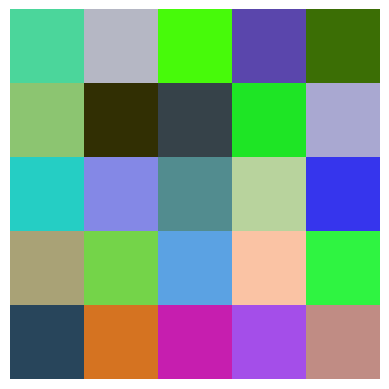

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Random 5x5 RGB image
image = np.random.randint(0, 256, (5, 5, 3), dtype=np.uint8)

# Show as colored pixels
plt.imshow(image)
plt.axis('off')  # hides axes for cleaner view
plt.show()

In [ ]:
image = np.expand_dims(image, axis=0)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=1,          # un seul filtre
        kernel_size=(3,3),  # taille du filtre
        strides=(1,1),      # pas de déplacement
        input_shape=(5,5,3),
        use_bias=False
    )
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 3, 3, 1)        │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
output = model(image)

Output of a 5x5x3 image convolved with 1 random filter imported from tensorflow

> Add blockquote



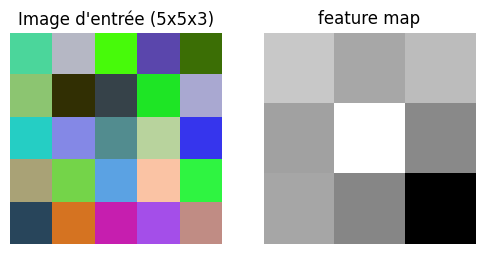

→ Forme entrée : (1, 5, 5, 3)
→ Forme sortie : (1, 3, 3, 1)


In [ ]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.title("Image d'entrée (5x5x3)")
plt.imshow(image[0])
plt.axis('off')

plt.subplot(1,2,2)
plt.title("feature map")
plt.imshow(output[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.show()

print("→ Forme entrée :", image.shape)
print("→ Forme sortie :", output.shape)

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=2,
        kernel_size=(3,3),
        strides=(1,1),
        input_shape=(5,5,3),
        use_bias=False
    )
])

#Apply convolution
output = model2(image)  # shape: (1,3,3,2)

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 3, 3, 2)        │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54 (216.00 B)

 Trainable params: 54 (216.00 B)

 Non-trainable params: 0 (0.00 B)

Output of a 5x5x3 image convolved with 2 random filters imported from tensorflow

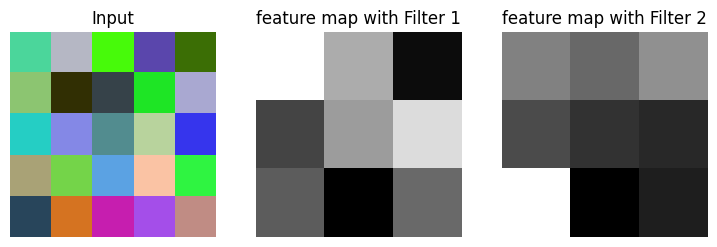

Input shape: (1, 5, 5, 3)
Output shape: (1, 3, 3, 2)


In [ ]:
# Visualization
plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.title("Input")
plt.imshow(image[0])
plt.axis('off')

plt.subplot(1,3,2)
plt.title("feature map with Filter 1")
# The output shape will be different after pooling, so we need to adjust the slicing
plt.imshow(output[0,:,:,0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("feature map with Filter 2")
# The output shape will be different after pooling, so we need to adjust the slicing
plt.imshow(output[0,:,:,1], cmap='gray')
plt.axis('off')

plt.show()

# 6️⃣ Shapes
print("Input shape:", image.shape)
print("Output shape:", output.shape)

Added 1 max pooling layer


In [ ]:
model2_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=2,
        kernel_size=(2,2),
        strides=(1,1),
        input_shape=(5,5,3),
        use_bias=False
    ),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2))
])

#Apply convolution and pooling
output = model2_1(image)  # shape will be affected by pooling

model2_1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 2)        │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 2)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24 (96.00 B)

 Trainable params: 24 (96.00 B)

 Non-trainable params: 0 (0.00 B)

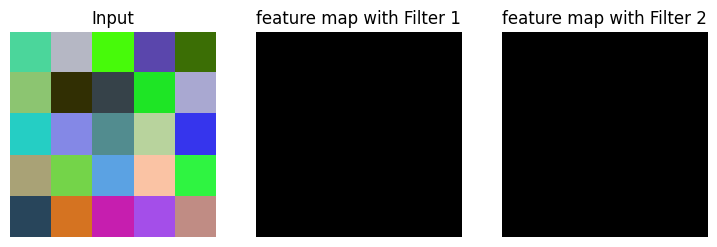

Input shape: (1, 5, 5, 3)
Output shape: (1, 1, 1, 2)


In [ ]:
# Visualization
plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.title("Input")
plt.imshow(image[0])
plt.axis('off')

plt.subplot(1,3,2)
plt.title("feature map with Filter 1")
# The output shape will be different after pooling, so we need to adjust the slicing
plt.imshow(output[0,:,:,0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("feature map with Filter 2")
# The output shape will be different after pooling, so we need to adjust the slicing
plt.imshow(output[0,:,:,1], cmap='gray')
plt.axis('off')

plt.show()

# 6️⃣ Shapes
print("Input shape:", image.shape)
print("Output shape:", output.shape)

Fashion emnist

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',         # Monitor the validation loss
    patience=5,                 # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True   # Restores model weights from the epoch with the best value of the monitored quantity
)

#Load Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[..., tf.newaxis]/255.0  # shape: (60000,28,28,1)
x_test  = x_test[..., tf.newaxis]/255.0

# CNN
model = models.Sequential([
    # First conv block
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Second conv block (Fashion MNIST needs a bit more capacity)
    layers.Conv2D(32, (3,3), activation='relu'),  # Keep 32 filters, not 64
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Classifier
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Summary
model.summary()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,482 (240.16 KB)

 Trainable params: 61,482 (240.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6427 - loss: 0.9759 - val_accuracy: 0.8462 - val_loss: 0.4205
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8133 - loss: 0.5126 - val_accuracy: 0.8563 - val_loss: 0.3855
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8320 - loss: 0.4616 - val_accuracy: 0.8747 - val_loss: 0.3253
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8492 - loss: 0.4211 - val_accuracy: 0.8843 - val_loss: 0.3055
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8595 - loss: 0.3925 - val_accuracy: 0.8863 - val_loss: 0.3036


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8632 - loss: 0.3840 - val_accuracy: 0.8865 - val_loss: 0.2916
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8666 - loss: 0.3708 - val_accuracy: 0.8912 - val_loss: 0.2866
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8728 - loss: 0.3527 - val_accuracy: 0.8963 - val_loss: 0.2777
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8700 - loss: 0.3549 - val_accuracy: 0.8990 - val_loss: 0.2663
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8749 - loss: 0.3394 - val_accuracy: 0.8940 - val_loss: 0.2745
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8770 - loss: 0.3418 - val_accuracy: 0.9018 - val_loss: 0.2660
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8765 - loss: 0.3345 - val_accuracy: 0.9010 - val_loss: 0.2595
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8764 - loss: 0.3336 -

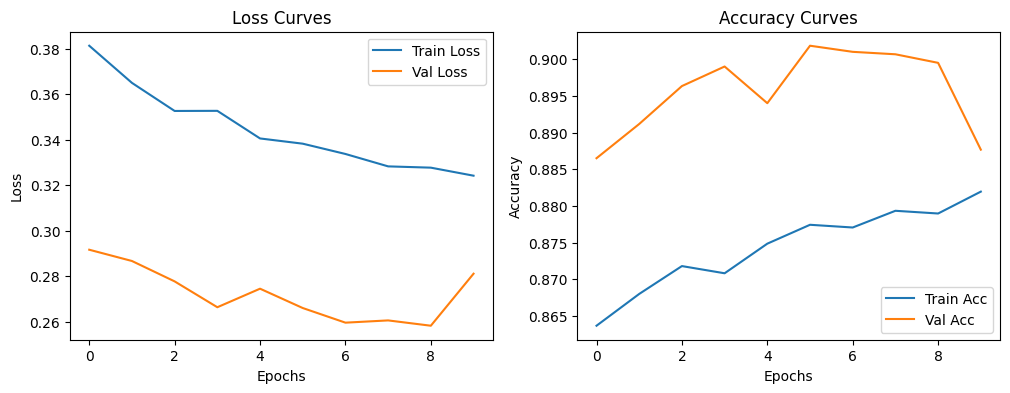

In [ ]:
history1 = model.fit(x_train, y_train, epochs=10, validation_split=0.1, callbacks=[early_stopping])

# Plot training & validation loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1,2,2)
plt.plot(history1.history['accuracy'], label='Train Acc')
plt.plot(history1.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Analyse des résultats d'entraînement sur Fashion-MNIST

- **Surapprentissage manifeste** : L'écart croissant entre la précision d'entraînement (88,29%) et de validation (88,77%) indique un début de surapprentissage, particulièrement visible après l'époque 6 où la validation commence à stagner puis décliner légèrement.

- **Convergence rapide** : Le modèle atteint un plateau de performance dès l'époque 3-4, suggérant qu'une stratégie d'arrêt précoce aurait pu être bénéfique pour économiser du temps de calcul et potentiellement améliorer la généralisation.

- **Performance globale solide** : Une précision de validation autour de 89% sur Fashion-MNIST est respectable, bien que des architectures optimisées (ResNet, EfficientNet) puissent atteindre 93-95% sur ce dataset.

- **Instabilité en fin d'entraînement** : La remontée soudaine de la loss de validation à l'époque 10 (0,2810) après avoir atteint un minimum suggère que le taux d'apprentissage pourrait être trop élevé ou qu'un scheduler aurait amélioré la stabilité.

- **Régularisation insuffisante** : L'augmentation de la loss de validation en fin d'entraînement, combinée à la baisse continue de la loss d'entraînement, indique qu'ajouter du dropout, de la régularisation L2 ou de l'augmentation de données pourrait améliorer la robustesse du modèle.

Digit emnist

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds

# ---- Load EMNIST Digits
ds_train, ds_test = tfds.load('emnist/digits', split=['train', 'test'], as_supervised=True)

# ---- Preprocess: normalize and add batch dimension
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.expand_dims(image, axis=-1)  # shape: (28,28,1)
    return image, label

batch_size = 32
ds_train = ds_train.map(preprocess).shuffle(1000).batch(batch_size)
ds_test  = ds_test.map(preprocess).batch(batch_size)

# ---- Simple CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5), # <--- ADD DROPOUT HERE

    layers.Dense(10, activation='softmax')
])

# ---- Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ---- Summary
model.summary()


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/digits/incomplete.PWFTTH_3.1.0/emnist-train.tfrecord*...:   0%|    …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/digits/incomplete.PWFTTH_3.1.0/emnist-test.tfrecord*...:   0%|     …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/digits/3.1.0. Subsequent calls will reuse this data.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
    callbacks=[early_stopping]
)

Epoch 1/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - accuracy: 0.9012 - loss: 0.3059 - val_accuracy: 0.9918 - val_loss: 0.0280
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9802 - loss: 0.0702 - val_accuracy: 0.9940 - val_loss: 0.0223
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9855 - loss: 0.0518 - val_accuracy: 0.9944 - val_loss: 0.0204
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9880 - loss: 0.0432 - val_accuracy: 0.9946 - val_loss: 0.0216
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9892 - loss: 0.0374 - val_accuracy: 0.9952 - val_loss: 0.0202
Epoch 6/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9900 - loss: 0.0342 - val_accuracy: 0.9955 - val_loss: 0.0199
Epoch 7/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9915 - loss: 0.0313 - val_accuracy: 0.9948 - val_loss: 0.0226
Epoch 8/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9918 - loss: 0

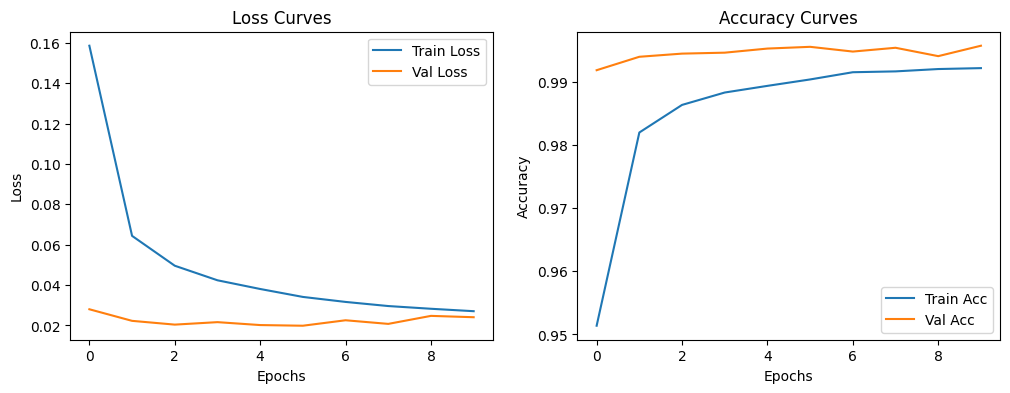

In [ ]:
plt.figure(figsize=(12,4))

# Loss curves
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy curves
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# Analyse des résultats d'entraînement sur MNIST

- **Excellente convergence** : Le modèle atteint une précision de validation de 99,57% dès l'époque 10, démontrant une convergence rapide et efficace. La loss de validation se stabilise autour de 0,024, ce qui est remarquable pour ce dataset classique.

- **Absence de surapprentissage** : Contrairement au Fashion-MNIST, les courbes de validation restent très proches des courbes d'entraînement tout au long du processus, indiquant que le modèle généralise excellemment sans signes de surapprentissage significatif.

- **Stabilité exemplaire** : Les métriques de validation demeurent stables après l'époque 5-6, sans fluctuations importantes, suggérant que le modèle a trouvé un optimum robuste et que l'early stopping aurait été approprié vers l'époque 6.

- **Performance quasi-optimale** : Avec 99,57% de précision sur MNIST, le modèle se rapproche des performances état de l'art (99,7-99,8%), ce qui est excellent compte tenu de la simplicité apparente de l'architecture utilisée.

- **Décroissance monotone de la loss** : Les deux courbes de loss diminuent de manière cohérente et parallèle, passant de ~0,15 à ~0,03, ce qui confirme que l'optimisation s'est déroulée de façon saine sans instabilités ni oscillations indésirables.